# Summary

The following work includes an exploratory data analysis of a dataset about customer churn in a telecommunication company. Next, I build machine learning models to predict whether customers will churn. The results are the following with logistic regression: accuracy score: 80.3%, ROC AUC score: 84.5%.

# Introduction

Customer churn is the loss of customers. Predicting customer churn can he very beneficial for a company, because effective retention programs can be developed (with e.g. targeted discounts, special deals).

In the dataset, each row represents a unique costumer, while the columns contain data about their services, account and demographics information. The "churn" column is chosen as the dependent variable and the data will be described, analysed and I will implement supervised machine learning models to predict the dependent variable: churn.

Besides churn, the following information is available about customers.

*   Services that each customer has signed up for: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information: how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*  Demographic information: gender, age range, and whether they have partners and dependents

The dataset is available [here](https://www.kaggle.com/blastchar/telco-customer-churn).

# Exploratory Data Analysis

The dataset contains 7043 rows, 21 columns with 19 features, and 11 missing values (next item).

In [36]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, plot_roc_curve, plot_confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

Columns:

* **CustomerID**: Customer ID
* **Gender**: Whether the customer is a male or a female
* **SeniorCitizen**: Whether the customer is a senior citizen or not
* **Partner**: Whether the customer has a partner or not
* **Dependents**: Whether the customer has dependents or not
* **Tenure**: Number of months the customer has stayed with the company
* **PhoneService**: Whether the customer has a phone service or not
* **MultipleLines**: Whether the customer has multiple lines or not
* **InternetService**: Customer’s internet service provider
* **OnlineSecurity**: Whether the customer has online security or not
* **OnlineBackup**: Whether the customer has online backup or not
* **DeviceProtection**: Whether the customer has device protection or not
* **TechSupport**: Whether the customer has tech support or not
* **StreamingTV**: Whether the customer has streaming TV or not
* **StreamingMovies**: Whether the customer has streaming movies or not
* **Contract**: The contract term of the customer
* **PaperlessBilling**: Whether the customer has paperless billing or not
* **PaymentMethod**: The customer’s payment method
* **MonthlyCharges**: The amount charged to the customer monthly
* **TotalCharges**: The total amount charged to the customer
* **Churn**: Whether the customer churned or not

In [37]:
df = pd.read_csv('telco_churn.csv')
df.rename(columns={"customerID": "CustomerID","gender": "Gender", "tenure": "Tenure"}, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
df.sample(5)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6465,8164-OCKUJ,Female,0,Yes,Yes,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.60,1286,No
604,2731-GJRDG,Female,0,No,No,32,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.55,3608,No
317,2321-OMBXY,Female,0,Yes,Yes,38,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),80.30,3058.65,Yes
4311,2187-LZGPL,Female,0,No,No,7,No,No phone service,DSL,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.10,293.3,Yes
2719,4295-YURET,Female,1,Yes,Yes,56,Yes,No,DSL,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),72.60,4084.35,No


**Data Preparation**

There are 11 missing values, which will be deleted. I will also convert SeniorCitizen values into object for better readability for the graphs.

In [40]:
# Converting TotalCharges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [41]:
# The customerID column is unnecessary for our analysis, because we already have the pandas dataframe indices. 
df.drop(['CustomerID'],axis=1, inplace=True)

# Dropping missing values
df.dropna(inplace = True)

# Converting the SeniorCitizen feature into object for better readability for visualisation
df['SeniorCitizen'].replace({0: 'No', 1 : 'Yes'}, inplace = True)

## Distribution of the target variable: Churn

The dataset is moderately imbalanced with the target variable showing a 26.6% churn rate.

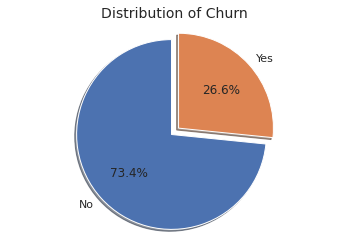

In [42]:
# Distribution of churn
total_churn_percent = round(df['Churn'].value_counts()/len(df) * 100,1)
labels = ['No', 'Yes']
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.pie(total_churn_percent, explode=explode, labels=labels, autopct='%.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Churn", fontsize=14);
plt.show()

## Numerical Features

Descriptive Statistics:

- count: number of samples
- mean: the mean of this attribute among all samples
- std: the standard deviation of this attribute
- min: the minimal value of this attribute
- 25%: the lower percentile
- 50%: the median
- 75%: the upper percentile
- max: the maximal value of this attribute

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


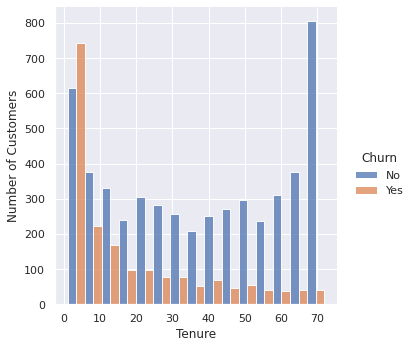

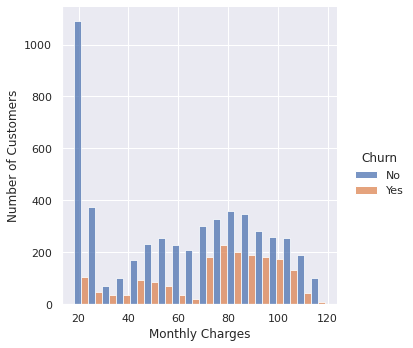

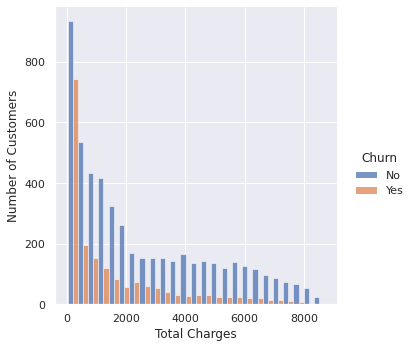

In [44]:
# Plotting numerical features by churn
sns.set_theme()
sns.displot(df, x='Tenure', hue='Churn', multiple='dodge').set(ylabel='Number of Customers')
sns.displot(df, x='MonthlyCharges', hue='Churn', multiple='dodge').set(xlabel='Monthly Charges', ylabel='Number of Customers')
sns.displot(df, x='TotalCharges', hue='Churn', multiple='dodge').set(xlabel='Total Charges', ylabel='Number of Customers')

Observations:


*   There is a higher rate of churn among customers who's total cost is lower.
*   Based on the data about tenure, we can say that the there is high rate churn among recent customers.


**Checking outliers**

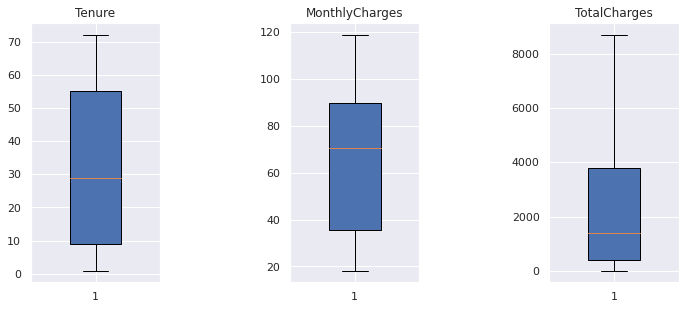

In [45]:
# Boxplots to check outliers
fig, axs = plt.subplots(1, 3)
axs[0].boxplot(df['Tenure'], widths = 0.4, patch_artist=True)
axs[0].set_title('Tenure')
axs[1].boxplot(df['MonthlyCharges'], widths = 0.4, patch_artist=True)
axs[1].set_title('MonthlyCharges')
axs[2].boxplot(df['TotalCharges'], widths = 0.4, patch_artist=True)
axs[2].set_title('TotalCharges')

# fig.tight_layout()
fig.subplots_adjust(left=0.5, right=2, bottom=0.1,
                    top=1, hspace=20, wspace=1)
plt.show()

The boxplots do not show any outliers.

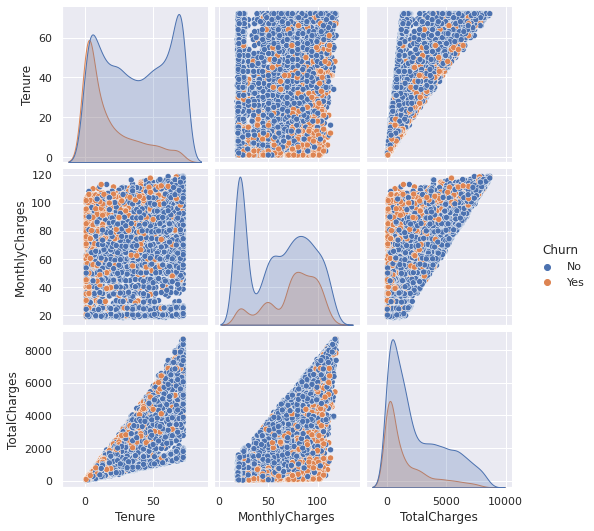

In [46]:
# Scatterplots numeric variables
sns.pairplot(df,vars = ['Tenure','MonthlyCharges','TotalCharges'], hue="Churn")

## Categorical Features

The dataset has 16 categorical features. First I visualize the distributions of the categorical features, then how churn might be affected by some of these categorical variables. 

In [47]:
df.iloc[:,:-1].describe(include='object').T

,count,unique,top,freq
Gender,7032,2,Male,3549
SeniorCitizen,7032,2,No,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


Observations:

*   The gender distribution in the dataset is balanced (50.5% male, 49.5% female)
*   The majority of customers (84%) are non-seniors.
*   The dataset is relatively balanced in terms of whether the customer has a partner (48%) or not (52%).
*   Only a minority of customers have dependents (30%).
*   The overwhelming majority of customers (90%) have a phone service.
*   With regards to services (online security, online backup, device protection, tech support, streaming TV, streaming movies) we can conclude that  around 22% of customers do not have internet service at all.
*   As for online security, online backup, device protection and tech support, fewer people use these services (29%, 35%, 34% and 29%, respectively) relative to those who do not use them. 
*   Streaming TV and streaming movies are relatively more successful services with 38% and 39% of people using them.
*   The majority of customers (55%) have a month-to-month contract, the rest have two-year and one-year contracts (24% and 21%, respectively).
*   The majority of customers use paperless billing (59%).
*   Most customers (34%) use electronic checks as a payment method, whereas other users use mailed checks, automatic bank transfers and credit cards with each category reaching approximately 22%.

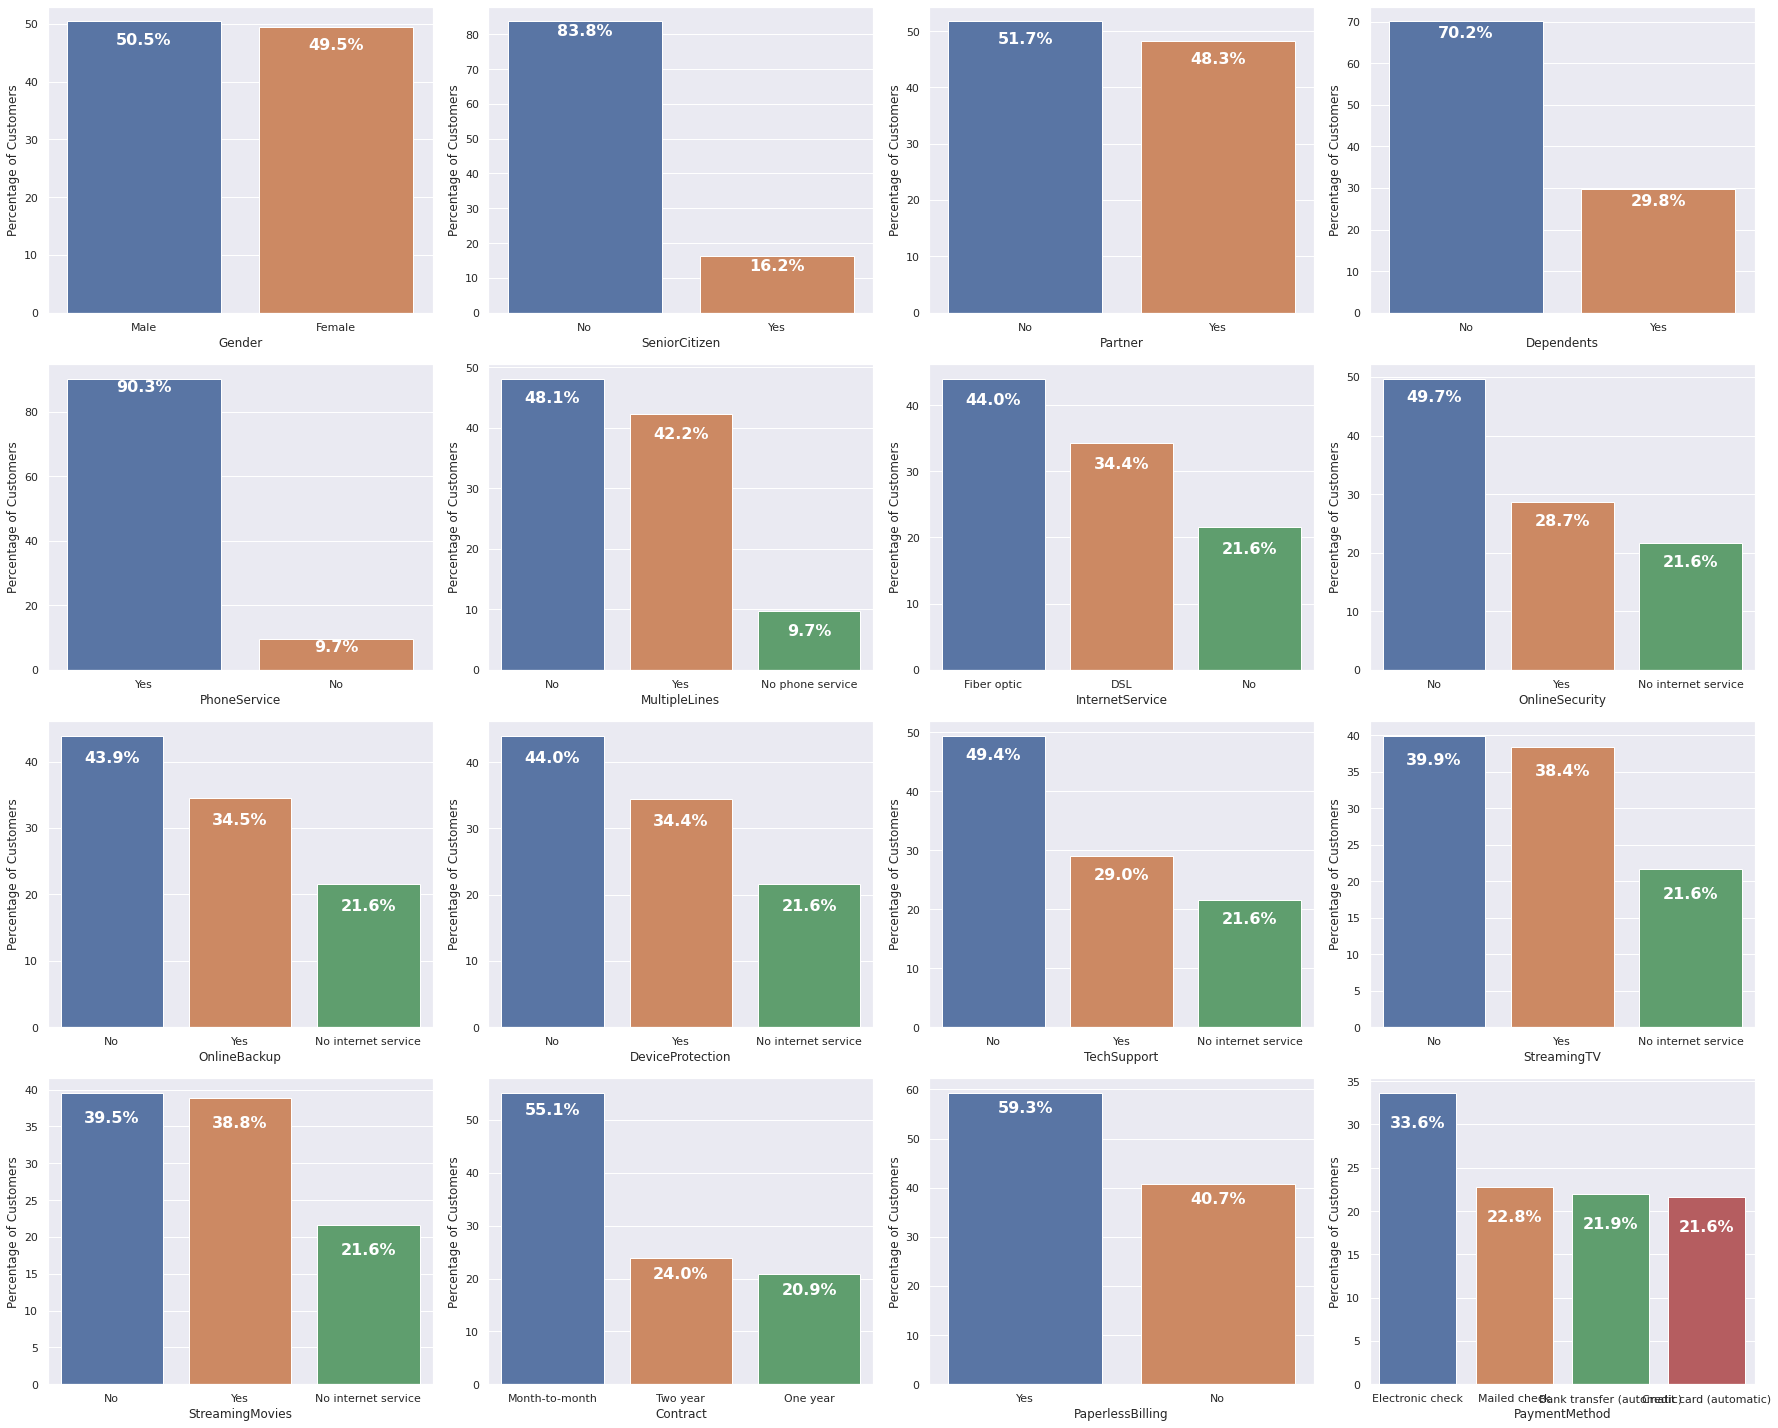

In [48]:
df_cat = df[['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]
sns.set_theme
fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (25,20))
index = 0
for i in range(4):
    for j in range(4):
      temp = df_cat.iloc[:,index].value_counts(normalize = True)\
                  .rename('Percentage')\
                  .mul(100)\
                  .reset_index()
      
      ax = sns.barplot(x="index", y="Percentage", data=temp, ax=axes[i][j])
      ax.set(xlabel=df_cat.columns[index], ylabel="Percentage of Customers")
      for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height-4, '{:.1f}%'.format(height), horizontalalignment='center', fontsize=16, weight='bold',color='white') 
      index+=1

fig.tight_layout()
plt.show(fig)

## Grouping features

**Churn by Gender, Age, Partner and Dependents**

  *   Gender does not seem to influence churn rate.


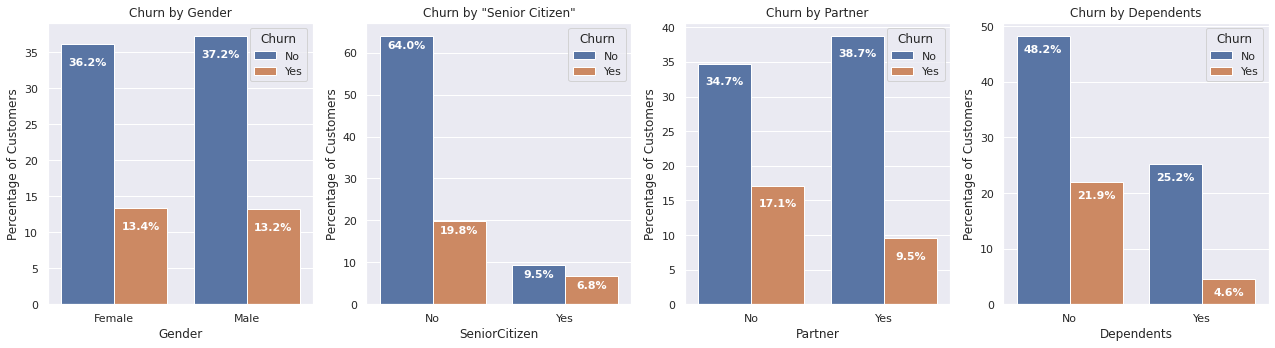

In [49]:
# Function to display churn percentages by features
def churn_percent_per_total(x_axis, title, ax,):
  fig.tight_layout()
  axis[ax].set_title(title)
  temp = df.groupby(x_axis)["Churn"].value_counts()/len(df)*100
  temp = temp.to_frame().rename({"Churn": "Percentage of Customers"}, axis=1).reset_index()
  ax = sns.barplot(x=x_axis, y= "Percentage of Customers", hue='Churn', data=temp, ax=axis[ax])
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height-3, '{:.1f}%'.format(height), horizontalalignment='center', fontsize=11, weight='bold', color='white') 

fig, axis = plt.subplots(1, 4, figsize=(18,5))
churn_percent_per_total('Gender', 'Churn by Gender', 0)
churn_percent_per_total('SeniorCitizen','Churn by \"Senior Citizen\"', 1)
churn_percent_per_total('Partner','Churn by Partner',2)
churn_percent_per_total('Dependents','Churn by Dependents', 3)

The following graphs show the churn percentage broken down by classes within the features. 

Observations: 

*   Whether the customer is a senior citizen has an impact: the ratio of churn  is higher among senior citizens (41.7%).
*   Customers without a partner have a higher churn rate (33%) vs. those who have a partner (19.7%).
*   Customers without dependents have a higher churn rate relative to those who do not.

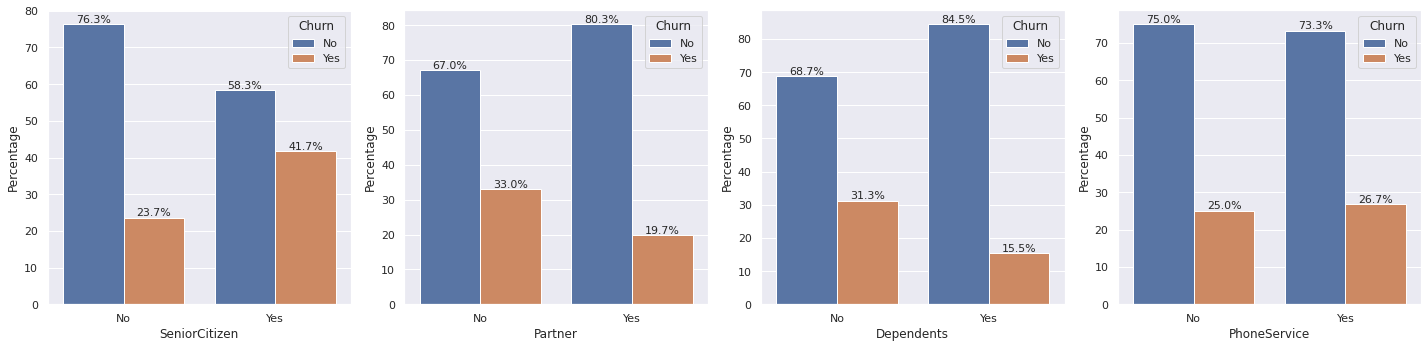

In [50]:
# Function to display percentages within subcategories
def churn_percent_per_subcat(x_list):   
  fig, axis = plt.subplots(1, len(x_list), figsize=(len(x_list)*5,5))
  
  
  
  for i in range(len(x_list)):
    percent_temp = (df.groupby([x_list[i]])['Churn']
                     .value_counts(normalize = True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(x_list[i]))
    ax = sns.barplot(x=x_list[i], y="Percentage", hue="Churn", data=percent_temp, ax=axis[i])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height +0.5, '{:.1f}%'.format(height), horizontalalignment='center', fontsize=11) 
    if df[x_list[i]].nunique() > 3:
      ax.set_xticklabels(ax.get_xticklabels(),rotation=-30)

  fig.tight_layout()

list1 = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService']
churn_percent_per_subcat(list1)

 *   Customers who have a month-to-month service have a higher churn rate than that of one- or two-year contract customers (42.7%).
*   Customers who pay through electronic checks have a higher churn rate (45.3%) vs. other types of payment method.
*   As for internet service, we can conclude that those customers who have  fiber optic internet service have the highest churn rate (41.9%).




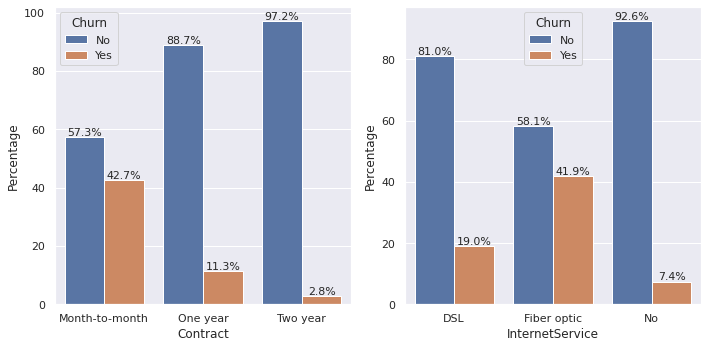

In [51]:
list2 = ['Contract', 'InternetService']
churn_percent_per_subcat(list2)

If customers have no Internet service, their churn rate is lower than either DSL or Fiber Optic Internet Service. 

Churn for fiber optic service is the highest among both senior and non-senior citizens.




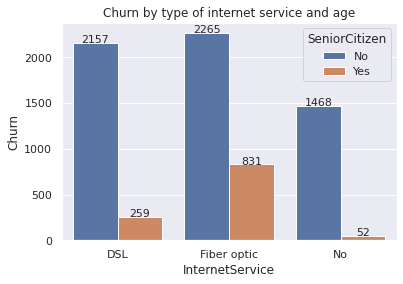

In [52]:
df_pivot = pd.pivot_table(df, index = ['SeniorCitizen','InternetService'], values = 'Churn', aggfunc = 'count').reset_index()
ax = sns.barplot(x='InternetService', y='Churn', hue='SeniorCitizen', data=df_pivot)
ax.set_title('Churn by type of internet service and age')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height +1, '{:.0f}'.format(height), horizontalalignment='center', fontsize=11)

## Feature Correlations

**Label encoding of categorical variables**

In [53]:
def object_to_int(dataframe):
    if dataframe.dtype=='object':
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

In [54]:
df_enc = df.apply(lambda x: object_to_int(x))

In [55]:
# All the labels have been converted to numerical variables to calculate correlations
df_enc.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Heatmap of pairwise Pearson correlations between features**

Based on the correlations below, we can drop the Gender and the PhoneService features, because their correlation with the target label is negligable.

*   Tenure and Conract have the greatest negative correlations with Churn.
*   Strongest positive correlation: between Tenure and TotalCharges (0.83).
*   Tenure and Contract have the next highest positive correlation with 0.68.
*   The third highest correlation is between TotalCharges and MonthlyCharges (0.65)

**Multicolliniarity**

Multicolliniar features (e.g. a correlation above 0.9) would be deleted. But in this dataset, there are no such correlations, so there is no need to remove features based on multicolliniarity.

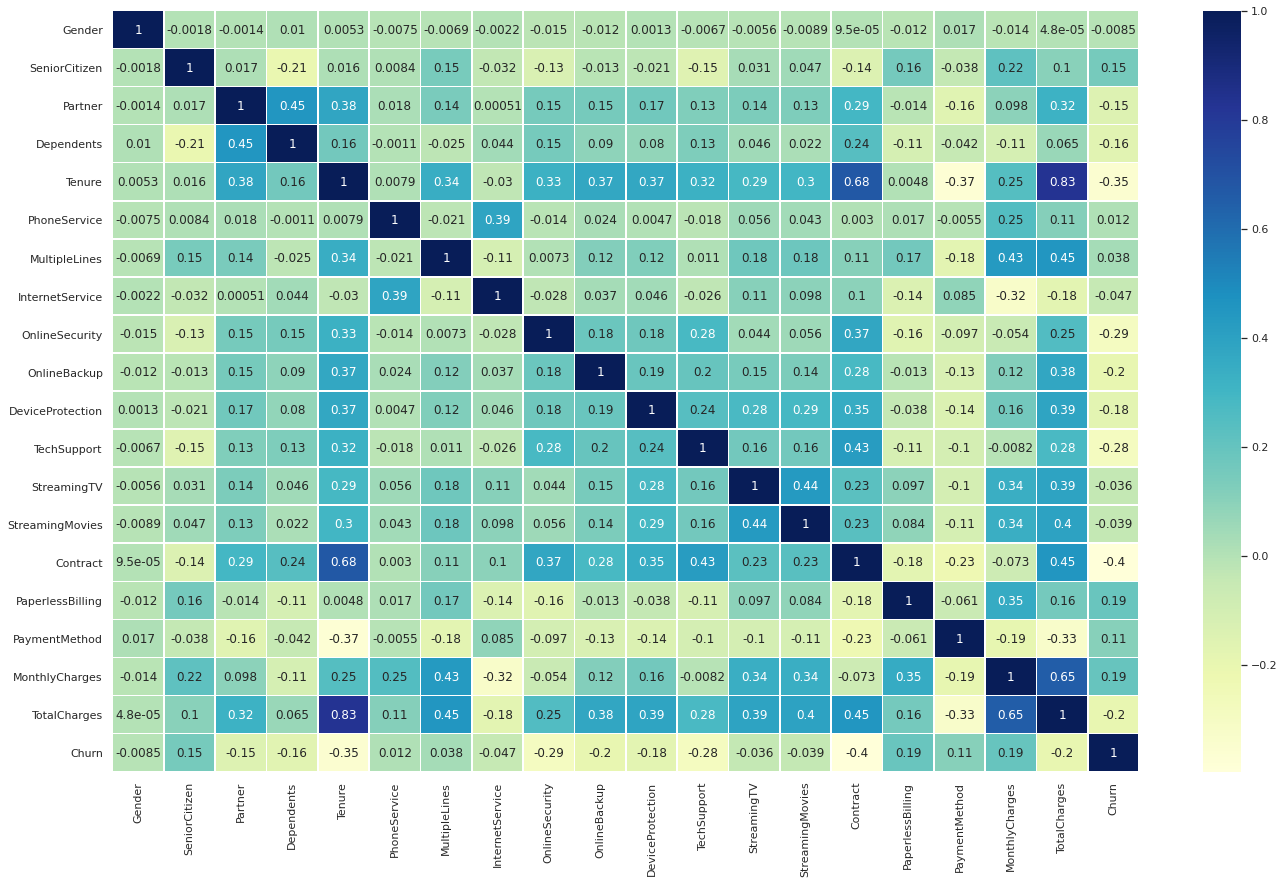

In [56]:
corrmat = df_enc.corr()
f, ax = plt.subplots(figsize =(23, 14))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.5, annot=True)
plt.show()

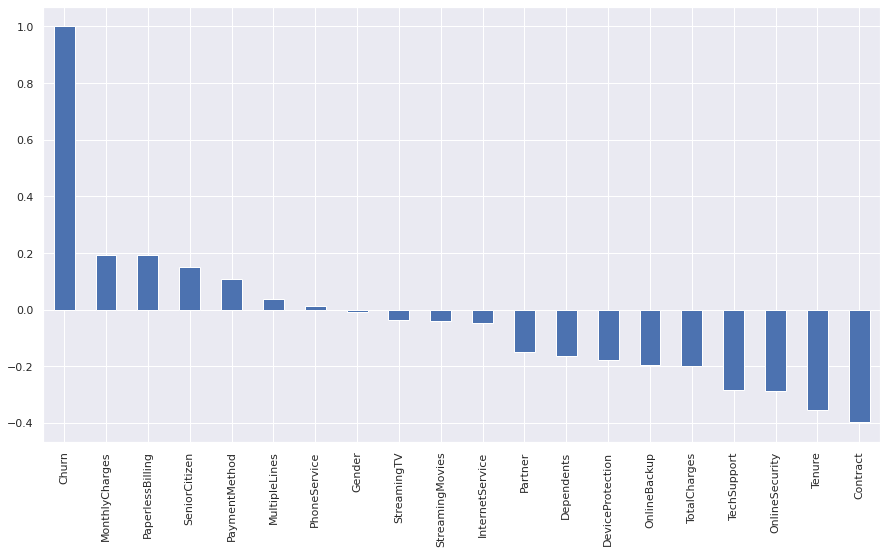

In [57]:
# Feature correlations with "Churn"
plt.figure(figsize=(15,8))
df_enc.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# Data Preprocessing

In [58]:
# Converting "Churn" into numerical
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Creating dummy variables from categorical variables (also can use OneHotEncoder)
df_dummies = pd.get_dummies(df)
df_dummies.head()

# Creating the dependent and independent variables for the models
# Splitting into train and test sets is automatically handled by cross validation
y = df['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling the numerical features to a range of 0 to 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.columns = features

In [59]:
X.head()

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [60]:
X_scaled.head()

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [61]:
# I create typical train and test sets for checking feature coefficients and the ROC curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=70)

# Model Building

**Discussion of Evaluation Metrics**

In case of balanced datasets, accuracy score can be a good metric to evaluate models by. Accuracy is a metric showing how many predictions we got right divided by the total number of examples. This particular dataset is moderately imbalanced (26.6% churners), therefore, aside from accuracy, I will consider other metrics as well to evaluate the models by.

To illustrate what issues might occur with considering only accuracy, let's consider a highly imbalanced dataset where there are 1000 observations, and only 10 churns. In this case, a model might have a 99% accuracy even if it mislabels all churns.

Which other metrics to consider? It depends on the business context, and we have to consider various questions. 

Are false negatives and false false positives equally costly? In this case, we can use F1 score, which is the harmonic mean of the precision and recall scores. If false positives are more costly, the beta value should be lower than 1, e.g. we can use an F0.5 Score. If, on the other hand, false negatives are more coslty, we can use an F2 score. 

Alternatively, both classes are equally important, we can consider a ROC AUC score (Area under the ROC Curve), which considers both classes as equally important. It measures the entire two-dimensional area underneath the entire ROC curve. An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at different classification thresholds. The curve plots two parameters: the True Positive Rate (or Recall) and the False Positive Rate.

In this particular dataset I will consider the models' **accuracy and ROC AUC score**.

**Stratified K-folds Cross Validation**

Startified K-Fold cross validation is used by default by Scikit-learn, which returns stratified folds. The folds are made by preserving the percentage of samples for each class. I will use a 5-fold cross validation. 

## Naive Bayes Classification

In [62]:
# Naive Bayes Classifier (scaled data not required)
nb = GaussianNB()
nb_scores = cross_validate(nb, X, y, cv=5, scoring=['accuracy','f1', 'roc_auc'])
nb_acc = nb_scores['test_accuracy'].mean()
nb_f1 = nb_scores['test_f1'].mean()
nb_roc_auc = nb_scores['test_roc_auc'].mean()

# Printing results
print('Accuracy of folds:', nb_scores['test_accuracy'])
print('Mean accuracy:',nb_acc)
print('\nF1 of folds:', nb_scores['test_f1'])
print('mean f1:',nb_f1)
print('\nroc_auc of folds:', nb_scores['test_roc_auc'])
print('overall roc_auc:',nb_roc_auc)

Accuracy of folds: [0.70646766 0.702914   0.68492176 0.68492176 0.69416785]
Mean accuracy: 0.694678608582772

F1 of folds: [0.61437908 0.60341556 0.58713886 0.58088931 0.58812261]
mean f1: 0.5947890844941327

roc_auc of folds: [0.82531539 0.83320737 0.81204047 0.80003783 0.81436803]
overall roc_auc: 0.8169938166662213


## Logistic Regression

Logistic Regression can be used to to validate our assumptions about the features with the help of the feature coefficients.

Positive coefficients increase the log-odds of the response (therefore increase the probability), and negative coefficients decrease the log-odds of the response (therefore decrease the probability).

In [63]:
# Running logistic regression model for feature coefficients (baseline)
lr_base = LogisticRegression(max_iter=500)
lr_base.fit(X_train_scaled, y_train)
y_pred_lr_base = lr_base.predict(X_test_scaled)
lr_acc_base = accuracy_score(y_test, y_pred_lr_base)
print('Logistic regression accuracy score (train-test split): ',lr_acc_base)

Logistic regression accuracy score (train-test split):  0.7981042654028436


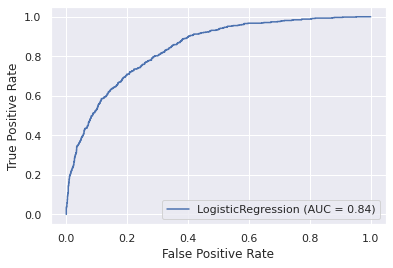

In [64]:
# ROC curve of baseline logistic regression after a typical train-test split
plot_roc_curve(lr_base,X_test_scaled, y_test)

In [65]:
# Coefficients of logistic regression 
coefs = pd.Series(lr_base.coef_[0],
                 index=X.columns.values)
coefs.sort_values(ascending=False)

TotalCharges                               1.464461
Contract_Month-to-month                    0.672839
InternetService_Fiber optic                0.462254
PaymentMethod_Electronic check             0.274140
OnlineSecurity_No                          0.251257
TechSupport_No                             0.224395
PaperlessBilling_Yes                       0.206388
MultipleLines_No phone service             0.141940
PhoneService_No                            0.141940
StreamingTV_Yes                            0.120504
MonthlyCharges                             0.119669
StreamingMovies_Yes                        0.119445
OnlineBackup_No                            0.091329
SeniorCitizen_Yes                          0.085246
MultipleLines_Yes                          0.075976
DeviceProtection_Yes                       0.061343
Dependents_No                              0.049314
Gender_Female                              0.046705
Partner_No                                 0.022142
DeviceProtec

Observations:

*   Higher Total charges lead to a higher chance of churn.
*   Tenure has the highest negative coefficent: the longer a person has been a customer at the company, the lower the chance of churn.
*   Similarly, if someone has a two-year contract, they are less likely to churn, whereas customers with a month-to-month contract more likely to churn.
*   Having DSL internet service reduces the probability of churn, whereas having Fiber optic internet service increases the chance of churn.


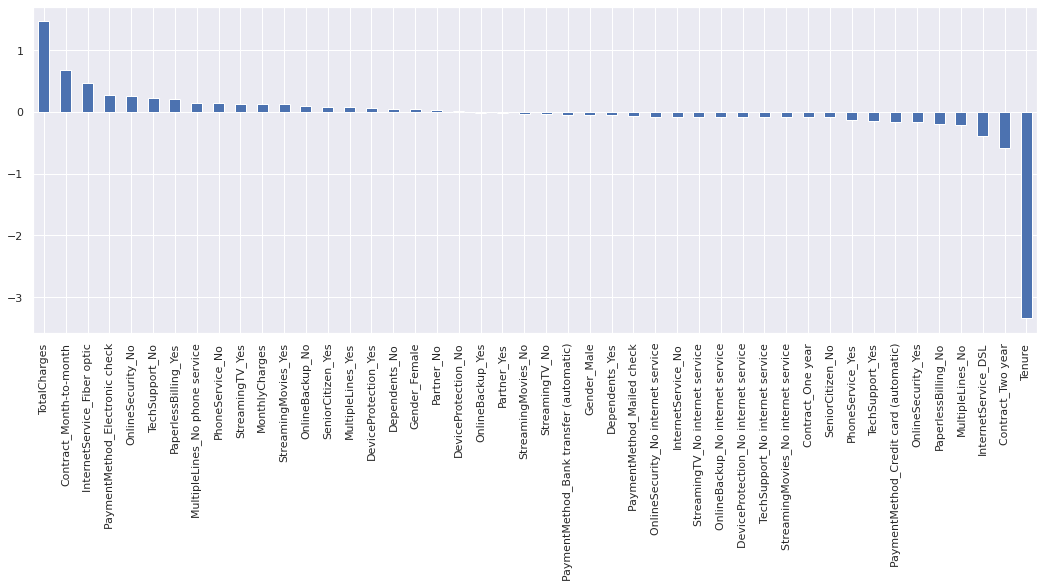

In [66]:
# Plotting the coefficients
coefs.sort_values(ascending = False).plot(kind='bar', figsize = (18,6), grid=True)

**Logistic regression with stratified cross validation**

In [67]:
# Running logistic regression model
lr = LogisticRegression(max_iter=500)
lr_scores = cross_validate(lr, X_scaled, y, cv=5, scoring=['accuracy','f1', 'roc_auc'])
lr_acc = lr_scores['test_accuracy'].mean()
lr_f1 = lr_scores['test_f1'].mean()
lr_roc_auc = lr_scores['test_roc_auc'].mean()

# Printing results
print('Accuracy of folds:', lr_scores['test_accuracy'])
print('Mean accuracy:',lr_acc)
print('\nF1 of folds:', lr_scores['test_f1'])
print('Mean F1:',lr_f1)
print('\nROC AUC of folds:', lr_scores['test_roc_auc'])
print('Mean ROC AUC:',lr_roc_auc)

Accuracy of folds: [0.80454869 0.81165601 0.78876245 0.80796586 0.80156472]
Mean accuracy: 0.8028995441407067

F1 of folds: [0.60202605 0.61979914 0.56387665 0.60641399 0.58788774]
Mean F1: 0.5960007149105863

ROC AUC of folds: [0.85718353 0.85871585 0.83473913 0.83480237 0.83742176]
Mean ROC AUC: 0.8445725276281086


## K Nearest Neighbors (KNN)

KNN requires scaled data as input, because it uses Euclidean distance between data points to find the nearest neighbors. Euclidean distance is sensitive to magnitude differences in the data. The features with high magnitudes will weigh more than features with low magnitudes.

**Choosing an optimal K**

I will iterate through values of k up to 25, so we can get the optimal k value that gives a maximal f1 score.

Choosing a small value of K leads to unstable decision boundaries, whereas a higher k value leads to smoother decision boundaries.

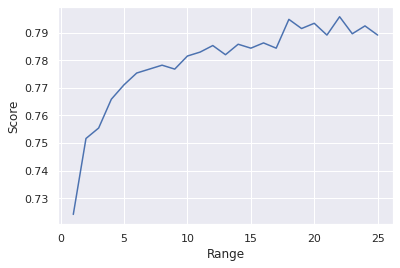

In [68]:
# Plotting KNN accuracy scores for k<=25 on scaled data
knn_scores = []
for k in range(1,26):  
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled,y_train)
    y_pred_knn_temp = knn_temp.predict(X_test_scaled)
    knn_f1_temp = accuracy_score(y_test, y_pred_knn_temp)
    knn_scores.append(knn_f1_temp)
plt.plot(range(1,26),knn_scores)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

Based on the analysis above, K = 22 gives us the highest accuracy score.

In [69]:
# Finding highest K: 22
knn_scores_df = pd.DataFrame(knn_scores).reset_index().rename(columns={0:'score'})
knn_scores_df.loc[knn_scores_df['score']==knn_scores_df['score'].max(), 'score']

21    0.795735
Name: score, dtype: float64

In [70]:
# Running KNN model with cross validation
knn = KNeighborsClassifier(n_neighbors=22)
knn_scores = cross_validate(knn, X_scaled, y, cv=5, scoring=['accuracy','f1', 'roc_auc'])
knn_acc = knn_scores['test_accuracy'].mean()
knn_f1 = knn_scores['test_f1'].mean()
knn_roc_auc = knn_scores['test_roc_auc'].mean()

# Printing results
print('Accuracy of folds:', knn_scores['test_accuracy'])
print('Mean accuracy:',knn_acc)
print('\nF1 of folds:', knn_scores['test_f1'])
print('Mean F1:',knn_f1)
print('\nROC AUC of folds:',knn_scores['test_roc_auc'])
print('Mean ROC AUC:',knn_roc_auc)

Accuracy of folds: [0.79246624 0.7960199  0.76955903 0.78307255 0.78093883]
Mean accuracy: 0.7844113106485456

F1 of folds: [0.57184751 0.5929078  0.53714286 0.56981664 0.56373938]
Mean F1: 0.5670908371645186

ROC AUC of folds: [0.84077708 0.83888368 0.80832137 0.81051797 0.81148955]
Mean ROC AUC: 0.8219979328121229


## Support Vector Machine Classifier

In [71]:
# SVM Classification with scaled dataset
svc = SVC(random_state = 5)
svc_scores = cross_validate(svc, X_scaled, y, cv=5, scoring=['accuracy','f1', 'roc_auc'])
svc_acc = svc_scores['test_accuracy'].mean()
svc_f1 = svc_scores['test_f1'].mean()
svc_roc_auc = svc_scores['test_roc_auc'].mean()

# Printing results
print('Accuracy of folds:', svc_scores['test_accuracy'])
print('Mean accuracy:',svc_acc)
print('\nF1 of folds:', svc_scores['test_f1'])
print('Mean F1:',svc_f1)
print('\nROC AUC of folds:', svc_scores['test_roc_auc'])
print('Mean ROC AUC:',svc_roc_auc)


Accuracy of folds: [0.80383795 0.81307747 0.78449502 0.79516358 0.80156472]
Mean accuracy: 0.7996277502954644

F1 of folds: [0.57407407 0.59600614 0.53740458 0.55963303 0.57010786]
Mean F1: 0.5674451368772748

ROC AUC of folds: [0.82349835 0.81647866 0.77170401 0.80055341 0.7904619 ]
Mean ROC AUC: 0.8005392683011265


## Decision Tree Classifier

In [72]:
# Decision Tree Classification
dt = DecisionTreeClassifier()
dt_scores = cross_validate(dt, X_scaled, y, cv=5, scoring=['accuracy','f1', 'roc_auc'])
dt_acc = dt_scores['test_accuracy'].mean()
dt_f1 = dt_scores['test_f1'].mean()
dt_roc_auc = dt_scores['test_roc_auc'].mean()

# Printing results
print('Accuracy of folds:', dt_scores['test_accuracy'])
print('Mean accuracy:',dt_acc)
print('\nF1 of folds:', dt_scores['test_f1'])
print('Mean F1:',dt_f1)
print('\nROC AUC of folds:', dt_scores['test_roc_auc'])
print('Mean ROC AUC:',dt_roc_auc)

Accuracy of folds: [0.72352523 0.73560768 0.72332859 0.71621622 0.73755334]
Mean accuracy: 0.7272462115352925

F1 of folds: [0.47785235 0.51688312 0.50064185 0.46442953 0.50996016]
Mean F1: 0.4939534007928092

ROC AUC of folds: [0.64462575 0.67371267 0.65986909 0.63704374 0.6653764 ]
Mean ROC AUC: 0.6561255312173033


## Random Forest Classifier

I will loop through different values of the number of estimators (number of trees in the forest) to find an optimal accuracy score.

In [73]:
# Finding f1 scores
rf_accuracy_scores = []
for i in range(1,61):
    rf_temp = RandomForestClassifier(n_estimators = i, random_state = 1)
    rf_temp.fit(X_train,y_train)
    y_pred_rf = rf_temp.predict(X_test)
    rf_f1_temp = accuracy_score(y_test, y_pred_rf)
    rf_accuracy_scores.append(rf_f1_temp)

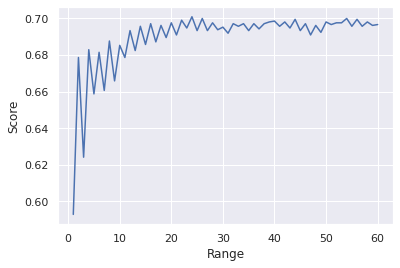

In [74]:
# Plotting RF accuracy scores
plt.plot(range(1,61),rf_accuracy_scores)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [75]:
# Finding the highest f1 score for best number of estimators: 40
rf_scores_df = pd.DataFrame(rf_accuracy_scores).reset_index().rename(columns={0:'score'})
rf_scores_df.loc[rf_scores_df['score']==rf_scores_df['score'].max(), 'score']

23    0.700948
Name: score, dtype: float64

In [76]:
# Random forest metrics for n_estimators=40
rf = RandomForestClassifier(n_estimators = 40, random_state = 1)
rf_scores = cross_validate(rf, X, y, cv=5, scoring=['accuracy','f1', 'roc_auc'])
rf_acc = rf_scores['test_accuracy'].mean()
rf_f1 = rf_scores['test_f1'].mean()
rf_roc_auc = rf_scores['test_roc_auc'].mean()

# Printing results 
print('Accuracy of folds:', rf_scores['test_accuracy'])
print('Mean accuracy:',rf_acc)
print('\nF1 of folds:', rf_scores['test_f1'])
print('Mean F1:',rf_f1)
print('\nROC AUC of folds:', rf_scores['test_roc_auc'])
print('Mean ROC AUC:',rf_roc_auc)

Accuracy of folds: [0.78962331 0.78678038 0.76742532 0.78733997 0.78733997]
Mean accuracy: 0.7837017917929151

F1 of folds: [0.54461538 0.53703704 0.51698671 0.53786708 0.55703704]
Mean F1: 0.5387086487141873

ROC AUC of folds: [0.82604143 0.82554058 0.79869144 0.79957924 0.8083209 ]
Mean ROC AUC: 0.811634718932208


## Model results summary

**Logistic regression** has the best performance out of the models. 

Accuracy score: 80.3%

ROC AUC score: 84.5%

In [77]:
models = pd.DataFrame({
    'Model': ['Support Vector Machine', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Accuracy': [svc_acc, knn_acc, lr_acc, 
              rf_acc, nb_acc, dt_acc],
    'ROC AUC': [svc_roc_auc, knn_roc_auc, lr_roc_auc, 
              rf_roc_auc, nb_roc_auc, dt_roc_auc],
    'F1 Score': [svc_f1, knn_f1, lr_f1, 
              rf_f1, nb_f1, dt_f1]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,ROC AUC,F1 Score
2,Logistic Regression,0.802900,0.844573,0.596001
0,Support Vector Machine,0.799628,0.800539,0.567445
1,KNN,0.784411,0.821998,0.567091
3,Random Forest,0.783702,0.811635,0.538709
5,Decision Tree,0.727246,0.656126,0.493953
4,Naive Bayes,0.694679,0.816994,0.594789
